In [17]:
import vdms
import util

db = vdms.vdms()
db.connect("localhost")

In [2]:
blobs = []
fd = open("videos/Megamind.mp4", 'rb')
blobs.append(fd.read())
fd.close()

In [3]:
query = [ {   
    "AddVideo": {
        "properties":{ 
            "name": "megamind_clip"
        }, 
        "codec": "h264",
        "container": "mp4"
    }   
}
]

resp, res_blob = db.query(query, [blobs])
print(resp)

[{'AddVideo': {'info': '', 'status': 0}}]


In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

[{'FindFrames': {'returned': 1, 'status': 0}}]
First Frame Size: 55.3349609375 KB


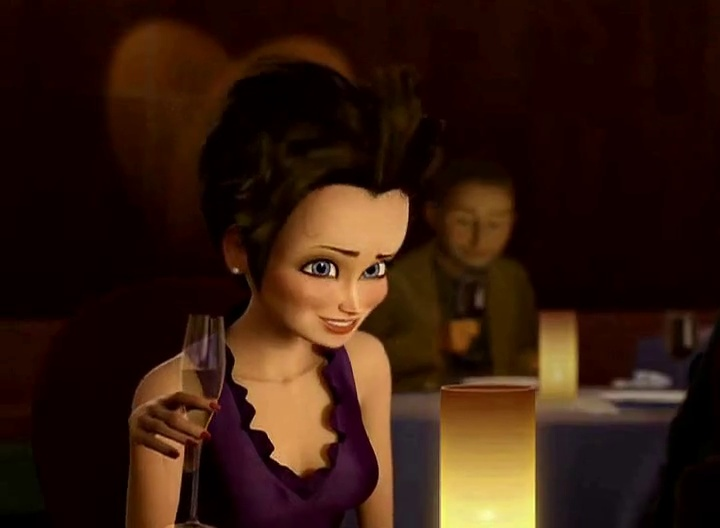

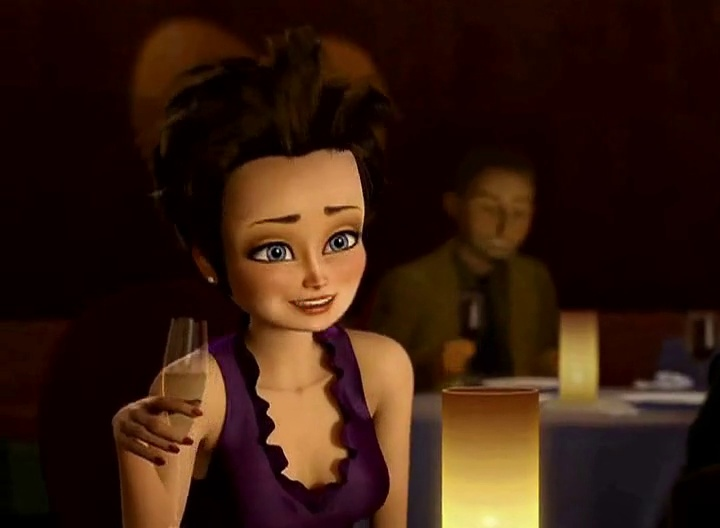

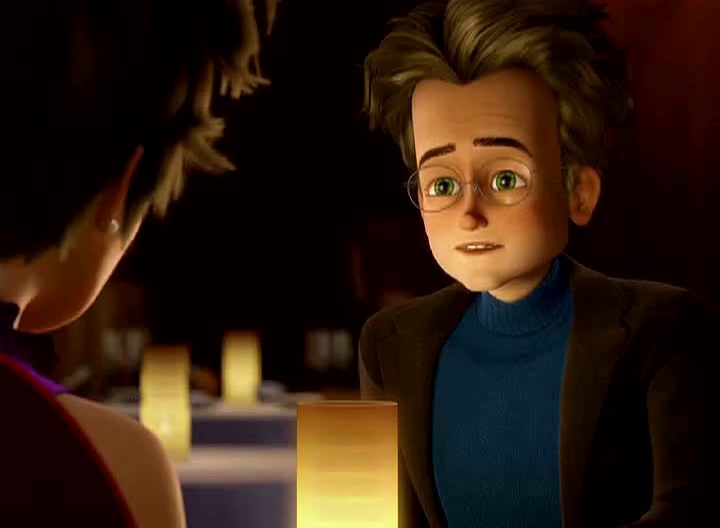

Number of images: 3


In [4]:
qry = [ {
    "FindFrames": {
        "frames": [20, 50, 100],
        "constraints": {
            "name": ["==", "megamind_clip"]
        }, 
        "format": "jpg"
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")

util.display_images(blob)    
print ("Number of images:", len(blob))

[{'FindFrames': {'returned': 1, 'status': 0}}]
First Frame Size: 29.1474609375 KB


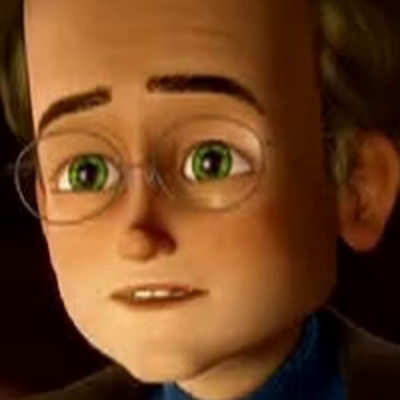

Number of images: 1


In [5]:
qry = [ {
    "FindFrames": {
        "frames": [100],
        "constraints": {
            "name": ["==", "megamind_clip"]
        }, 
        "format": "jpg", 
        "operations": [{
            "type": "crop",
            "height": 200,
            "width": 200,
            "x": 400,
            "y": 100
        },{
            "type": "resize",
            "height": 400,
            "width": 400
        }, 
        ]
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")

util.display_images(blob)    
print ("Number of images:", len(blob))

In [ ]:
qry = [ {
    "FindFrames": {
        "constraints": {
            "name": ["==", "megamind_clip"]
        }, 
        "operations": [
            {
                "type": "interval",
                "start": 0,
                "stop": 5,
                "step": 1
            }
        ],
        "format": "jpg"
    }
}
]

response, blob = db.query(qry)

print(response)
print("First Frame Size:", len(blob[0])/1024, "KB")

util.display_images(blob)    
print ("Number of images:", len(blob))